In [21]:
import matplotlib.pyplot as plt
from rich import print_json, print
import polars as pl
import glob

pl.Config.set_tbl_cols(-1)# Configure Polars to display all columns


polars.config.Config

La structure du dataset X est :
```
- root
-- part_{i}
--- may_july_chunk_{k}
--- ...
-- ..
```

In [22]:
# Glob and concat all the dataset in a lazy dataframe
csv_files = glob.glob('data/part_1/may_july_chunk_*.csv')
lazy_frames = [pl.scan_csv(file, schema_overrides={'in_reply_to_status_id_str': pl.Utf8}, ignore_errors=True) for file in csv_files]
common_schema = lazy_frames[0].collect_schema()
lazy_frames = [frame.with_columns([pl.col(col).cast(dtype) for col, dtype in common_schema.items()]) for frame in lazy_frames]
lazy_df = pl.concat(lazy_frames)

# Create a not lazy dataframe that is a sample of n rows
n = 100000 # Change this variable to adjust the sample size
df = lazy_df.collect().sample(n=n)

In [23]:
print("\nDataframe schema:")
schema_dict = {key: str(value) for key, value in df.schema.items()} # Adapt to dictionnary to rich print
print_json(data=schema_dict)
df.describe()
df.head(5)

Dataframe schema:

{
  "": "Int64",
  "id": "Int64",
  "text": "String",
  "url": "String",
  "epoch": "Float64",
  "media": "String",
  "retweetedTweet": "Boolean",
  "retweetedTweetID": "String",
  "retweetedUserID": "String",
  "id_str": "Int64",
  "lang": "String",
  "rawContent": "String",
  "replyCount": "Float64",
  "retweetCount": "Float64",
  "likeCount": "Float64",
  "quoteCount": "Float64",
  "conversationId": "Float64",
  "conversationIdStr": "Float64",
  "hashtags": "String",
  "mentionedUsers": "String",
  "links": "String",
  "viewCount": "String",
  "quotedTweet": "Boolean",
  "in_reply_to_screen_name": "String",
  "in_reply_to_status_id_str": "String",
  "in_reply_to_user_id_str": "Float64",
  "location": "String",
  "cash_app_handle": "String",
  "user": "String",
  "date": "String",
  "_type": "String",
  "type": "String"
}

,id,text,url,epoch,media,retweetedTweet,retweetedTweetID,retweetedUserID,id_str,lang,rawContent,replyCount,retweetCount,likeCount,quoteCount,conversationId,conversationIdStr,hashtags,mentionedUsers,links,viewCount,quotedTweet,in_reply_to_screen_name,in_reply_to_status_id_str,in_reply_to_user_id_str,location,cash_app_handle,user,date,_type,type
i64,i64,str,str,f64,str,bool,str,str,i64,str,str,f64,f64,f64,f64,f64,f64,str,str,str,str,bool,str,str,f64,str,str,str,str,str,str
44990,1800749174708899969,"""@MiaFarrow @1980_nicoletta Nev…","""https://twitter.com/MMike1959/…",1.7182e9,"""[]""",false,null,null,1800749174708899969,"""en""","""@MiaFarrow @1980_nicoletta Nev…",0.0,0.0,0.0,0.0,1.8007e18,1.8007e18,"""[]""","""[{'id_str': '33235771', 'name'…","""[]""","""{'count': '12', 'state': 'Enab…",false,"""MiaFarrow""","""1.8006848112011963e+18""",3.3235771e7,null,null,"""{'id': 1768713592998969344, 'i…","""2024-06-12""",null,"""tweet-"""
28632,1800942759257231725,"""@RickyDoggin MAGA!🙏🇺🇸""","""https://twitter.com/Cann112156…",1.7182e9,"""[]""",false,null,null,1800942759257231725,"""et""","""@RickyDoggin MAGA!🙏🇺🇸""",0.0,0.0,0.0,0.0,1.8004e18,1.8004e18,"""[]""","""[{'id_str': '14945134412346368…","""[]""","""{'state': 'Enabled'}""",false,"""RickyDoggin""","""1.800392519580263e+18""",1.4945e18,null,null,"""{'id': 1755246076763013120, 'i…","""2024-06-12""",null,"""tweet-"""
6110,1800690028961825099,"""@hendopolis The Conservative g…","""https://twitter.com/BeddoeSusa…",1.7182e9,"""[]""",false,null,null,1800690028961825099,"""en""","""@hendopolis The Conservative g…",2.0,0.0,0.0,0.0,1.8006e18,1.8006e18,"""[]""","""[{'id_str': '16692859', 'name'…","""[]""","""{'count': '43', 'state': 'Enab…",false,"""hendopolis""","""1.800643204603134e+18""",1.6692859e7,null,null,"""{'id': 4197091714, 'id_str': '…","""2024-06-12""",null,"""tweet-"""
13065,1801587173033935206,"""@greta Dogs can sense evil. Th…","""https://twitter.com/reammaggie…",1.7184e9,"""[]""",false,null,null,1801587173033935206,"""en""","""@greta Dogs can sense evil. Th…",0.0,0.0,0.0,0.0,1.8016e18,1.8016e18,"""[]""","""[{'id_str': '16031927', 'name'…","""[]""","""{'count': '9', 'state': 'Enabl…",false,"""greta""","""1.801577130494452e+18""",1.6031927e7,null,null,"""{'id': 1437173003314417664, 'i…","""2024-06-14""",null,"""tweet-"""
25200,1801228905438646453,"""@JenC222 Explain how MAGA is r…","""https://twitter.com/DoNotEverC…",1.7183e9,"""[]""",false,null,null,1801228905438646453,"""en""","""@JenC222 Explain how MAGA is r…",0.0,0.0,0.0,0.0,1.8009e18,1.8009e18,"""[]""","""[{'id_str': '49961286', 'name'…","""[]""","""{'count': '4', 'state': 'Enabl…",false,"""JenC222""","""1.801061338749252e+18""",4.9961286e7,null,null,"""{'id': 1484166671929651201, 'i…","""2024-06-13""",null,"""tweet-"""


In [24]:
# Filter the dataframe to include only the specified columns
filtered_df = df.select([
    'id', 'rawContent', 'url', 'retweetedTweet', 'lang', 'replyCount',
    'retweetCount', 'likeCount', 'quoteCount', 'viewCount',
    'quotedTweet', 'user', 'date'
])

print("Filtered dataframe:")
print(filtered_df.head(1))

Filtered dataframe:

shape: (1, 13)
┌─────┬─────┬─────┬────────┬──────┬────────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┐
│ id  ┆ raw ┆ url ┆ retwee ┆ lang ┆ replyC ┆ retwe ┆ likeC ┆ quote ┆ viewC ┆ quote ┆ user  ┆ date  │
│ --- ┆ Con ┆ --- ┆ tedTwe ┆ ---  ┆ ount   ┆ etCou ┆ ount  ┆ Count ┆ ount  ┆ dTwee ┆ ---   ┆ ---   │
│ i64 ┆ ten ┆ str ┆ et     ┆ str  ┆ ---    ┆ nt    ┆ ---   ┆ ---   ┆ ---   ┆ t     ┆ str   ┆ str   │
│     ┆ t   ┆     ┆ ---    ┆      ┆ f64    ┆ ---   ┆ f64   ┆ f64   ┆ str   ┆ ---   ┆       ┆       │
│     ┆ --- ┆     ┆ bool   ┆      ┆        ┆ f64   ┆       ┆       ┆       ┆ bool  ┆       ┆       │
│     ┆ str ┆     ┆        ┆      ┆        ┆       ┆       ┆       ┆       ┆       ┆       ┆       │
╞═════╪═════╪═════╪════════╪══════╪════════╪═══════╪═══════╪═══════╪═══════╪═══════╪═══════╪═══════╡
│ 180 ┆ @Mi ┆ htt ┆ false  ┆ en   ┆ 0.0    ┆ 0.0   ┆ 0.0   ┆ 0.0   ┆ {'cou ┆ false ┆ {'id' ┆ 2024- │
│ 074 ┆ aFa ┆ ps: ┆        ┆      ┆        ┆       ┆       ┆       ┆ nt':  ┆       ┆ : 176 ┆ 06-12 │
│ 917 ┆ rro ┆ //t ┆        ┆      ┆        ┆       ┆       ┆       ┆ '12', ┆       ┆ 87135 ┆       │
│ 470 ┆ w   ┆ wit ┆        ┆      ┆        ┆       ┆       ┆       ┆ 'stat ┆       ┆ 92998 ┆       │
│ 889 ┆ @19 ┆ ter ┆        ┆      ┆        ┆       ┆       ┆       ┆ e':   ┆       ┆ 96934 ┆       │
│ 996 ┆ 80_ ┆ .co ┆        ┆      ┆        ┆       ┆       ┆       ┆ 'Enab ┆       ┆ 4,    ┆       │
│ 9   ┆ nic ┆ m/M ┆        ┆      ┆        ┆       ┆       ┆       ┆ …     ┆       ┆ 'i…   ┆       │
│     ┆ ole ┆ Mik ┆        ┆      ┆        ┆       ┆       ┆       ┆       ┆       ┆       ┆       │
│     ┆ tta ┆ e19 ┆        ┆      ┆        ┆       ┆       ┆       ┆       ┆       ┆       ┆       │
│     ┆ Nev ┆ 59/ ┆        ┆      ┆        ┆       ┆       ┆       ┆       ┆       ┆       ┆       │
│     ┆ …   ┆ …   ┆        ┆      ┆        ┆       ┆       ┆       ┆       ┆       ┆       ┆       │
└─────┴─────┴─────┴────────┴──────┴────────┴───────┴───────┴───────┴───────┴───────┴───────┴───────┘

In [25]:
# Display the content of the 'viewCount' and 'user' columns for one row in dictionary format
row_index = 0  # Adjust the index to select a specific row
view_count_dict = filtered_df[row_index, 'viewCount']
user_dict = filtered_df[row_index, 'user']

print("ViewCount column for one row as dictionary:")
print_json(data=view_count_dict)

print("\nUser column for one row as dictionary:")
print_json(data=user_dict)

ViewCount column for one row as dictionary:

"{'count': '12', 'state': 'EnabledWithCount'}"

User column for one row as dictionary:

"{'id': 1768713592998969344, 'id_str': '1768713592998969344', 'url': 'https://twitter.com/MikeMiller', 'username': 'MikeMiller', 'rawDescription': '#KamalaHarris 4 President #NavyVet #retired lifelong Democrat', 'created': datetime.datetime(2024, 3, 15, 18, 59, 36, tzinfo=datetime.timezone.utc), 'followersCount': 5719, 'friendsCount': 5049, 'statusesCount': 19667, 'favouritesCount': 15053, 'listedCount': 4, 'mediaCount': 1624, 'location': '', 'profileImageUrl': 'https://pbs.twimg.com/profile_images/1768903264110878721/fc6Wz_nx_normal.jpg', 'profileBannerUrl': 'PW', 'protected': 'PW', 'verified': False, 'blue': False, 'blueType': None, 'descriptionLinks': ['PW'], '_type': 'PW'}"

[Lien DrawDB](https://drawdb.vercel.app/editor?shareId=e6c18b8ae53063fa1dfa9cc8a849605f)

```sql
CREATE TABLE `x_post` (
	`id` INTEGER NOT NULL AUTO_INCREMENT UNIQUE,
	`user_id` INTEGER,
	`lang` TEXT(65535),
	`text` TEXT(65535),
	`like_count` INTEGER,
	`reply_count` INTEGER,
	`retweet_count` INTEGER,
	`quote_count` INTEGER,
	`date` DATE,
	PRIMARY KEY(`id`)
);


CREATE TABLE `x_user` (
	`id` INTEGER NOT NULL AUTO_INCREMENT UNIQUE,
	`name` TEXT(65535),
	`bio` TEXT(65535),
	`followers_count` INTEGER,
	`follows_count` INTEGER,
	PRIMARY KEY(`id`)
);


CREATE TABLE `bsky_post` (
	`id` INTEGER NOT NULL AUTO_INCREMENT UNIQUE,
	`user_id` INTEGER,
	`lang` TEXT(65535),
	`text` TEXT(65535),
	`like_count` INTEGER,
	`reply_count` INTEGER,
	`retweet_count` INTEGER,
	`quote_count` INTEGER,
	`date` DATE,
	PRIMARY KEY(`id`)
);


CREATE TABLE `bsky_user` (
	`id` INTEGER NOT NULL AUTO_INCREMENT UNIQUE,
	`name` TEXT(65535),
	`bio` TEXT(65535),
	`followers_count` INTEGER,
	`follows_count` INTEGER,
	PRIMARY KEY(`id`)
);


ALTER TABLE `x_post`
ADD FOREIGN KEY(`user_id`) REFERENCES `x_user`(`id`)
ON UPDATE NO ACTION ON DELETE NO ACTION;
ALTER TABLE `bsky_post`
ADD FOREIGN KEY(`user_id`) REFERENCES `bsky_user`(`id`)
ON UPDATE NO ACTION ON DELETE NO ACTION;
```

/tmp/ipykernel_7506/2106626662.py:2: DeprecationWarning: `GroupBy.count` is deprecated. It has been renamed to `len`.
  date_counts = df.group_by('date').count()


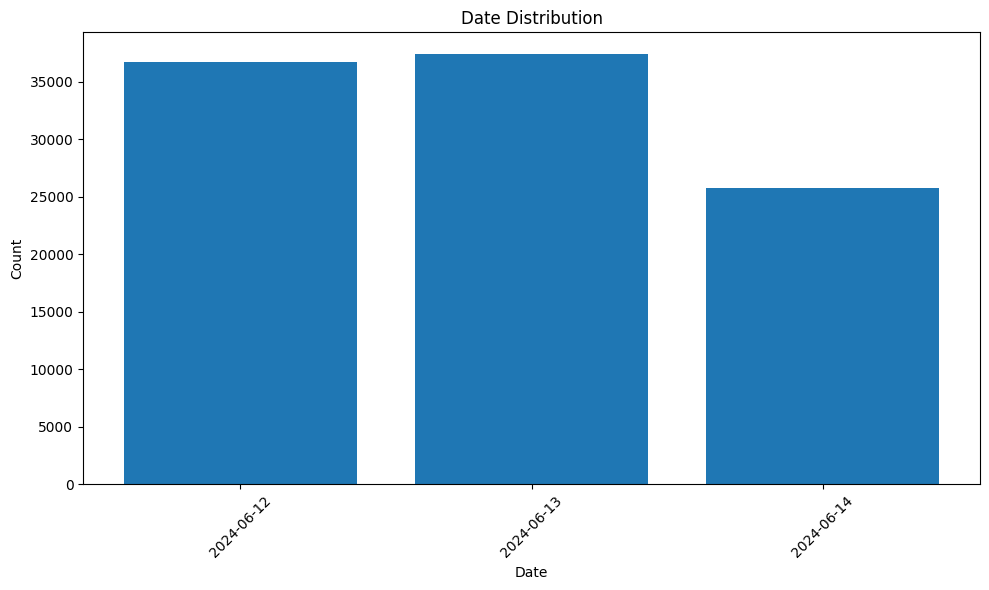

In [26]:
# Group by 'date' and count occurrences
date_counts = df.group_by('date').count()

# Sort by 'date' to ensure correct order
date_counts = date_counts.sort('date')

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(date_counts['date'], date_counts['count'])
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Date Distribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()